# Description

#### About DataGateway:
DataGateway is a Japanese startup with a mission to build a more digital society by applying the power of cutting-edge technology including AI, blockchain, and decentralized computing. One of DataGateway's clients is looking for an algorithm that predicts the number of views that videos uploaded to their platform are likely to get so they can maximize views. This algorithm will also help the company price the ads shown in the videos on its platform.

#### About this challenge:
The goal is to develop a machine learning model to predict the number of views that videos are likely to receive based on attributes such as duration, location, and time published.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import display

Description Data
Image Data
Metadata
Title Data
Untitled.ipynb
Running
solution_format.csv

### Image Info

In [2]:
train_image = pd.read_csv('Image Data/train_image_df.csv')

train_image.head(5)

,comp_id,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,...,image_3991,image_3992,image_3993,image_3994,image_3995,image_3996,image_3997,image_3998,image_3999,image_4000
0,1,0.484456,0.036087,-0.149328,0.144475,-0.617386,0.035018,0.169174,-0.005733,-0.104908,...,-0.090408,-0.032915,-0.010857,-0.015954,0.123416,0.195833,-0.066449,0.115818,-0.005140,0.017278
1,2,0.074533,-0.015655,-0.016286,-0.480964,0.687917,0.037131,-0.149725,-0.002098,0.099383,...,-0.625816,-0.009616,0.004558,0.008310,-0.173496,0.133518,-0.488898,0.084832,0.146566,0.007997
2,3,-0.396809,0.021490,-1.723037,0.666147,-0.631924,0.047724,0.336041,-0.003904,0.039683,...,-0.078059,0.086320,-0.005606,0.002414,-0.164493,0.218473,0.151292,-0.076860,0.008321,0.012555
3,4,0.995316,0.012766,0.387472,-0.684791,-0.209261,0.013654,0.138517,0.005586,0.079277,...,-0.190714,-0.005452,-0.003889,0.013430,0.344406,0.038220,0.210446,-0.145128,-0.019172,0.000532
4,5,-0.611648,0.000860,-0.572393,0.894287,-0.191228,-0.111583,-0.011111,0.003231,-0.160582,...,-0.040437,-0.142134,-0.022771,-0.013134,-0.024869,0.125129,0.215967,0.005288,0.145715,0.001425


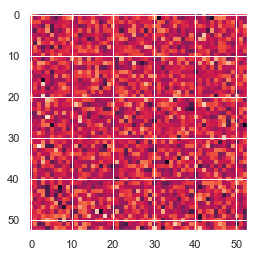

In [3]:
# show the image
plt.imshow(train_image['image_3998'].values[:2809].reshape(53,53))
plt.show()

### Title Info

In [4]:
train_title = pd.read_csv('Title Data/train_title_df.csv')

display(train_title.head(5))

,comp_id,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,...,title_41,title_42,title_43,title_44,title_45,title_46,title_47,title_48,title_49,title_50
0,1,-0.977637,-0.543310,0.079403,0.205560,-1.497104,0.230466,0.566112,-0.662264,0.130342,...,0.059434,-0.272340,-0.030180,-0.109040,-0.033425,0.728739,0.142030,0.397541,1.270722,-0.816523
1,2,0.041873,0.644655,0.140869,-0.664714,-0.062992,0.240086,-1.017593,1.019706,0.340133,...,0.242961,-0.404538,0.335224,-0.158068,-0.178225,0.351125,0.959121,0.673848,-0.530106,0.133466
2,3,-0.905595,0.097928,0.111981,-0.064753,-1.566516,0.140807,-0.946588,-0.342442,0.031226,...,0.414191,-0.457968,0.157185,-0.116985,0.404937,-0.220503,0.443171,0.643445,0.357957,0.525154
3,4,0.069220,0.411544,0.177700,-0.739998,-0.932620,-0.717982,-0.406487,-0.267096,0.114066,...,0.211731,-0.812590,0.258014,-0.180143,-0.564691,-0.515378,0.613686,0.817547,0.325042,0.254415
4,5,0.503560,-0.210970,-0.085412,0.549240,-0.019521,-0.255597,0.841144,0.250485,0.224235,...,-0.517912,0.543584,0.492052,-0.204867,-0.011538,-0.328607,-0.150055,-0.992373,-0.266003,-0.037134


### Data Description

In [5]:
train_desc = pd.read_csv('Description Data/train_desc_df.csv')

train_desc.head()

,comp_id,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,1,-0.009555,0.002479,0.002927,0.015774,-0.008177,-0.016036,0.026697,-0.000106,0.025788,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
1,2,-0.009555,0.002479,0.002927,0.015774,-0.008177,-0.016036,0.026697,-0.000106,0.025788,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
2,3,-0.356706,0.213562,0.252663,0.090735,0.328961,-0.482705,0.067300,0.384217,-0.147253,...,-0.626436,-0.102908,0.576792,-0.805986,0.310637,0.422263,0.403496,0.264240,7.057590,-0.252417
3,4,-0.294013,0.165262,0.257102,0.421037,0.463214,-0.769155,0.159450,0.236385,-0.183974,...,-0.435836,0.052975,0.108777,-0.599593,0.408430,0.591615,0.415667,0.334706,7.025648,-0.309093
4,5,-0.028657,0.157017,0.282709,-2.674227,-0.711383,2.259387,-0.162175,0.605468,0.712229,...,-1.714496,0.297421,-0.097744,0.000669,-1.639307,0.244313,0.099975,0.371806,-2.259024,-0.131085


# MetaData Exploration

- 1) comp_id: Unique ID
- 2) ad_blocked: Indicates whether or not ads are blocked on the video
- 3) embed: Indicates whether or not the video can be embedded
- 4) ratio: The aspect ratio of the video
- 5) duration: Duration of the video (in seconds)
- 6) language: Language used in the video (encoded)
- 7) partner: Indicates whether the video is certified by the partner/sponsor
- 8) partner_active: Indicates whether the partner/sponsor is still active
- 9) n_likes: The number of likes the video has
- 10) n_tags: The number of tags in the video
- 11) n_formats: The number of streaming formats available for the video
- 12) dayofweek: The day of week when the video was published
- 13) hour: The hour when the video was published (24-hour time format)

In [6]:
train_meta = pd.read_csv('metadata/train_meta_df.csv')

display(train_meta.head(5))

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1,False,True,1.77778,86,3,True,False,0,290,3,0,5,6
1,2,False,True,1.33333,1129,2,True,False,0,1443,0,2,5,6
2,3,False,True,1.76667,1163,2,True,False,0,329,0,1,5,6
3,4,False,True,1.77778,1326,2,True,False,0,63,0,3,5,6
4,5,False,True,1.77273,2612,2,True,False,3,37,0,0,5,6


In [7]:
train_meta.shape

(3000, 14)

In [8]:
len(train_meta[train_meta.duplicated()])

0

In [9]:
train_meta.isnull().sum()

comp_id           0
ad_blocked        0
embed             0
ratio             0
duration          0
language          0
partner           0
partner_active    0
n_likes           0
views             0
n_tags            0
n_formats         0
dayofweek         0
hour              0
dtype: int64

In [10]:
train_meta.describe()

,comp_id,ratio,duration,language,n_likes,views,n_tags,n_formats,dayofweek,hour
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,1.650824,545.717667,2.942000,0.186333,548.708333,3.826000,4.011667,3.933667,8.143333
std,866.169729,0.307880,1003.643982,1.898904,0.986883,1212.155134,5.169329,1.189398,2.175663,6.825515
min,1.000000,0.550000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000
25%,750.750000,1.739130,61.000000,2.000000,0.000000,58.000000,0.000000,3.000000,2.000000,4.000000
50%,1500.500000,1.777780,143.000000,2.000000,0.000000,128.000000,1.000000,4.000000,3.000000,5.000000
75%,2250.250000,1.777780,421.250000,4.000000,0.000000,348.000000,8.000000,5.000000,7.000000,13.000000
max,3000.000000,3.200000,20068.000000,10.000000,20.000000,9545.000000,60.000000,8.000000,7.000000,23.000000


In [11]:
train_meta.infer_objects().dtypes

comp_id             int64
ad_blocked           bool
embed                bool
ratio             float64
duration            int64
language            int64
partner              bool
partner_active       bool
n_likes             int64
views               int64
n_tags              int64
n_formats           int64
dayofweek           int64
hour                int64
dtype: object

In [12]:
categorical = ['ad_blocked', 'embed', 'partner', 'partner_active','dayofweek', 'hour']
numerical = ['comp_id', 'ratio', 'duration', 'language', 'n_likes', 'views', 'n_tags', 'n_formats']

train_meta[categorical].nunique()

ad_blocked         2
embed              2
partner            2
partner_active     2
dayofweek          6
hour              24
dtype: int64

In [13]:
#Later Usage
#bins = pd.IntervalIndex.from_tuples([(0, 6), (6, 12), (12, 18), (18, 24)])
#pd.cut(train_meta['hour'], bins, labels=["midnight", "morning", "afternoon", "night"], include_lowest=True)

In [14]:
#preprocess later

#X['ad_blocked'] = train_meta['ad_blocked'].astype(int)
#X['embed'] = train_meta['embed'].astype(int)
#X['partner'] = train_meta['partner'].astype(int)
#X['partner_active'] = train_meta['partner_active'].astype(int)

In [15]:
train_meta['hour'] = train_meta['hour'].astype('category')
train_meta['dayofweek'] = train_meta['hour'].astype('category')

In [16]:
features_final = pd.get_dummies(train_meta[categorical])

features_final[numerical] = train_meta[numerical]

features_final

,ad_blocked,embed,partner,partner_active,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,...,hour_22,hour_23,comp_id,ratio,duration,language,n_likes,views,n_tags,n_formats
0,False,True,True,False,0,0,0,0,0,0,...,0,0,1,1.77778,86,3,0,290,3,0
1,False,True,True,False,0,0,0,0,0,0,...,0,0,2,1.33333,1129,2,0,1443,0,2
2,False,True,True,False,0,0,0,0,0,0,...,0,0,3,1.76667,1163,2,0,329,0,1
3,False,True,True,False,0,0,0,0,0,0,...,0,0,4,1.77778,1326,2,0,63,0,3
4,False,True,True,False,0,0,0,0,0,0,...,0,0,5,1.77273,2612,2,3,37,0,0
5,False,True,True,False,0,0,0,0,0,0,...,0,0,6,1.77778,1073,2,0,65,0,2
6,False,True,True,False,0,0,0,0,0,0,...,0,0,7,1.77778,24,2,0,2233,2,3
7,False,True,False,False,0,0,0,0,0,0,...,0,0,8,1.77778,141,2,0,95,3,3
8,False,True,True,False,0,0,0,0,0,0,...,0,0,9,1.77778,1510,2,0,57,0,5
9,False,True,True,False,0,0,0,0,0,0,...,0,0,10,1.77778,2501,2,0,1035,3,1


In [17]:
X = features_final.drop(columns=['views','comp_id'])
y = features_final['views']

# Predicting Models

###  Possible Supervised Learning Models for Regression
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- Nearest Neighbors Regression
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Multivariate Regression

In [18]:
from sklearn.model_selection import train_test_split

np.random.seed(30)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)

Submissions are evaluated on: 

$$ error = e^{ -RMSE / \max (y_{hat})} $$ 

where Root Mean Squared Error is calculated between the predicted values $(y_i{hat})$ and observed values $(y_i)$.

Note:  $$ RMSE = \sqrt\sum_i(y_i - y_i{hat})^2 $$

We can expect:
- A perfect model will have a value of 1.
- A very bad model (large -ve rmse) will approach infinity. (underestimates)
- A very bad model (large +ve rmse) will approach 0. (overestimates)
- Our average model has a value predicted below

If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data, i.e. you've created a model that tests well in sample, but has little predictive value when tested out of sample.

### Average Predictor 

Using an Average predictor to set a benchline for our model

In [19]:
#A model that always predicts the mean of the data it was trained on
def mean_predict(X, mean=True):
    if mean:
        return (y_train.mean() * np.ones(X.shape[0])).reshape(-1,1)
    else:
        return (y_train.mean() * np.zeros(X.shape[0])).reshape(-1,1)

In [20]:
from sklearn.metrics import mean_squared_error

def exp_error(y_true, y_pred):
    rms_error = np.sqrt(mean_squared_error(y_true, y_pred))
    error = np.exp(-(rms_error/np.max(y_true)))
    return error

In [21]:
mse = mean_squared_error(y, mean_predict(X, False))
errscore = exp_error(y, mean_predict(X, False))

print('Train custom error: ', exp_error(y_train, mean_predict(X_train, False)))
print('Train mse: ', mean_squared_error(y_train, mean_predict(X_train, False)))
print()

print('Validation custom error: ', exp_error(y_val, mean_predict(X_val, False)))
print('Validation mse: ', mean_squared_error(y_val, mean_predict(X_val, False)))
print()

print('Total custom error: ', errscore)
print('Total mse prediction: ', mse)

Train custom error:  0.8689804130644011
Train mse:  1711989.170222222

Validation custom error:  0.8641044543619937
Validation mse:  1943677.016

Total custom error:  0.8698975896022412
Total mse prediction:  1769911.1316666666


In [22]:
mse = mean_squared_error(y, mean_predict(X))
errscore = exp_error(y, mean_predict(X))

print('Train custom error: ', exp_error(y_train, mean_predict(X_train)))
print('Train mse: ', mean_squared_error(y_train, mean_predict(X_train)))
print()

print('Validation custom error: ', exp_error(y_val, mean_predict(X_val)))
print('Validation mse: ', mean_squared_error(y_val, mean_predict(X_val)))
print()

print('Total custom error: ', errscore)
print('Total Mean validation mse prediction: ', mse)

Train custom error:  0.8796681564090596
Train mse:  1426920.0276071113

Validation custom error:  0.876050394399285
Validation mse:  1595436.040528

Total custom error:  0.8807495131403476
Total Mean validation mse prediction:  1469049.0308373333


### Prediction with selected models

Using a selected predictor to set predict views for our model

In [23]:
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test, verbose=True): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute mse on the first 300 training samples which is y_train[:300]
    results['mse_train'] = mean_squared_error(y_train, predictions_train)
        
    # Compute mse on test set using accuracy_score()
    results['mse_test'] = mean_squared_error(y_test, predictions_test)
    
    # Compute error_state using custom exp error
    results['err_train'] = exp_error(y_train, predictions_train) * (10^100)
        
    # TODO: Compute error_state using custom exp error on the test set
    results['err_test'] = exp_error(y_test, predictions_test) * (10^100)
       
    # Success
    if verbose:
        print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [24]:
def evaluate(results, mse, errscore):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of regressors
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - mse: The score for the naive predictor
      - errscore: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 4, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'mse_train', 'err_train', 'pred_time', 'mse_test', 'err_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("MSE Score")
    ax[0, 2].set_ylabel("Err-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("MSE Score")
    ax[1, 2].set_ylabel("Err-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("MSE Score on Training Subset")
    ax[0, 2].set_title("Err score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("MSE Score on Testing Set")
    ax[1, 2].set_title("Err-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = mse, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = mse, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = errscore*(10^100), xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = errscore*(10^100), xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 2600000)) 
    ax[0, 2].set_ylim((0, 30000))
    ax[1, 1].set_ylim((0, 2600000)) 
    ax[1, 2].set_ylim((0, 30000))
    

    # Set additional plots invisibles
    ax[0, 3].set_visible(False)
    ax[1, 3].axis('off')

    # Create legend
    for i, learner in enumerate(results.keys()):
        plt.bar(0, 0, color=colors[i], label=learner)
    plt.legend()
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Regression Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

C:\Users\Kenny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


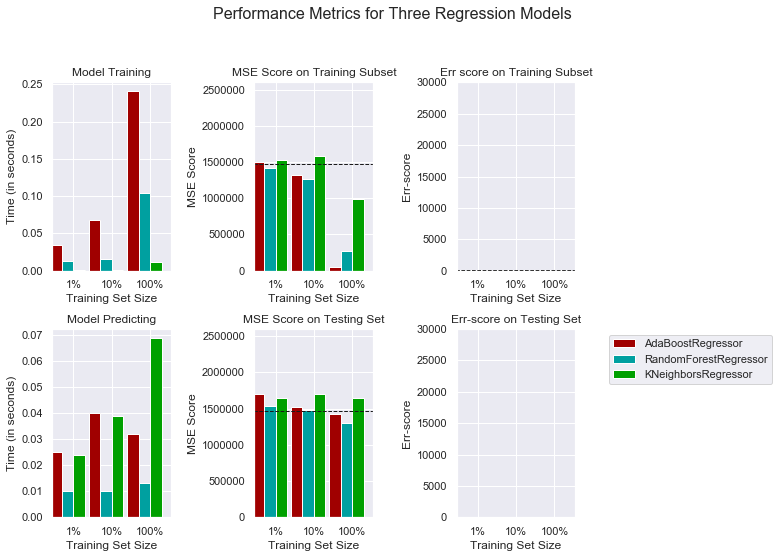

In [25]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, mean_squared_error


# TODO: Initialize the three models
reg_A = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
reg_B = RandomForestRegressor()
reg_C = KNeighborsRegressor()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = int(1*len(y_train))
samples_10 =  int(0.1*len(y_train))
samples_1 =   int(0.01*len(y_train))

# Collect results on the learners
results = {}
for reg in [reg_A, reg_B, reg_C]:
    reg_name = reg.__class__.__name__
    results[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[reg_name][i] = \
        train_predict(reg, samples, X_train, y_train, X_val, y_val, False)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, mse, errscore)

In [33]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, mean_squared_error


# TODO: Initialize the three models
reg_A = AdaBoostRegressor()
reg_B = RandomForestRegressor()
reg_C = KNeighborsRegressor()

sample_space = (len(y_train)*np.arange(0.05,1.05,0.05)).astype(int)

# Collect results on the learners
long_results = {}
for reg in [reg_A, reg_B, reg_C]:
    reg_name = reg.__class__.__name__
    long_results[reg_name] = {}
    for i, samples in enumerate(sample_space):
        long_results[reg_name][i] = train_predict(reg, samples, X_train, y_train, X_val, y_val)

AdaBoostRegressor trained on 112 samples.
AdaBoostRegressor trained on 225 samples.
AdaBoostRegressor trained on 337 samples.
AdaBoostRegressor trained on 450 samples.
AdaBoostRegressor trained on 562 samples.
AdaBoostRegressor trained on 675 samples.
AdaBoostRegressor trained on 787 samples.
AdaBoostRegressor trained on 900 samples.
AdaBoostRegressor trained on 1012 samples.
AdaBoostRegressor trained on 1125 samples.
AdaBoostRegressor trained on 1237 samples.
AdaBoostRegressor trained on 1350 samples.
AdaBoostRegressor trained on 1462 samples.
AdaBoostRegressor trained on 1575 samples.
AdaBoostRegressor trained on 1687 samples.
AdaBoostRegressor trained on 1800 samples.
AdaBoostRegressor trained on 1912 samples.
AdaBoostRegressor trained on 2025 samples.
AdaBoostRegressor trained on 2137 samples.
AdaBoostRegressor trained on 2250 samples.
RandomForestRegressor trained on 112 samples.
RandomForestRegressor trained on 225 samples.


C:\Users\Kenny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor trained on 337 samples.
RandomForestRegressor trained on 450 samples.
RandomForestRegressor trained on 562 samples.
RandomForestRegressor trained on 675 samples.
RandomForestRegressor trained on 787 samples.
RandomForestRegressor trained on 900 samples.
RandomForestRegressor trained on 1012 samples.
RandomForestRegressor trained on 1125 samples.
RandomForestRegressor trained on 1237 samples.
RandomForestRegressor trained on 1350 samples.
RandomForestRegressor trained on 1462 samples.
RandomForestRegressor trained on 1575 samples.
RandomForestRegressor trained on 1687 samples.
RandomForestRegressor trained on 1800 samples.
RandomForestRegressor trained on 1912 samples.
RandomForestRegressor trained on 2025 samples.
RandomForestRegressor trained on 2137 samples.
RandomForestRegressor trained on 2250 samples.
KNeighborsRegressor trained on 112 samples.
KNeighborsRegressor trained on 225 samples.
KNeighborsRegressor trained on 337 samples.
KNeighborsRegressor trained 

In [34]:
from ipywidgets import interact 

columns = list(long_results.keys())

@interact(model=columns)
def viz_errors(model):
    fig, ax = plt.subplots(1,2, figsize = (14,7))

    mse_train, mse_test, err_train, err_test = [],[],[],[]
    for i in sorted(long_results[model].keys()):
        y = long_results[model][i]
        mse_train.append(y['mse_train'])
        mse_test.append(y['mse_test'])
        err_train.append(y['err_train'])
        err_test.append(y['err_test'])

    x = np.arange(0.05,1.05,0.05)*100

    ax[0].plot(x, mse_train, '.-', label='train error');
    ax[0].plot(x, mse_test, '.-', label='test error');

    ax[0].set_xlabel('% of Training/Test Data');
    ax[0].set_xticks(range(0,110,10))

    ax[0].set_ylabel('Mean Squared Error(MSE)');
    ax[0].set_ylim((0,3500000))
    ax[0].axhline(y = mse, xmin = -0.1, xmax = 100.0, linewidth = 1, color = 'k', linestyle = 'dashed', alpha=0.5)
    ax[0].legend();


    ax[1].plot(x, err_train, '.-', label='train score');
    ax[1].plot(x, err_test, '.-', label='test score');

    ax[1].set_xlabel('% of Training/Test Data');
    ax[1].set_xticks(range(0,110,10))

    ax[1].set_ylabel('Custom Error');
    #ax[1].axhline(y = errscore, xmin = -0.1, xmax = 100.0, linewidth = 1, color = 'k', linestyle = 'dashed', alpha=0.5)
    ax[1].legend();

    plt.suptitle('Training & Testing Errors Across Two Error Metrics', fontsize=16, color='black');

interactive(children=(Dropdown(description='model', options=('AdaBoostRegressor', 'RandomForestRegressor', 'KN…

## OPTIMIZING THE MODEL

Optimizing the model with Grid Search

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, mean_squared_error

regressor = RandomForestRegressor()

parameters = {'n_estimators':[10,50,100,200],
              'max_depth':[None,2,5,10]
             }

grid = GridSearchCV(estimator=regressor, 
                    param_grid=parameters, 
                    cv=5,
                    scoring=make_scorer(exp_error, ),
                    verbose=1)

In [29]:
grid_fit = grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   36.7s finished


In [142]:
grid_fit.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [143]:
results = grid_fit.cv_results_
index = grid_fit.best_index_
results['mean_test_score'][index]

0.8879543301766636

In [144]:
train_pred = grid_fit.predict(X_train)

exp_error(train_pred, y_train), mean_squared_error(train_pred, y_train)

(0.8480149449070072, 958816.0558706608)

In [145]:
test_pred = grid_fit.predict(X_val)

exp_error(test_pred, y_val), mean_squared_error(test_pred, y_val)

(0.7242410070593104, 1221855.4832773143)

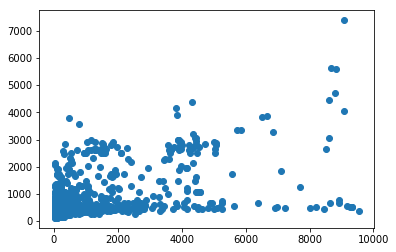

In [438]:
res = pd.DataFrame(data = {'true_value':y_train,'predictions':train_pred.astype(int)})
res['dev'] = res['true_value'] - res['predictions']
res

plt.scatter('true_value', 'predictions', data=res)

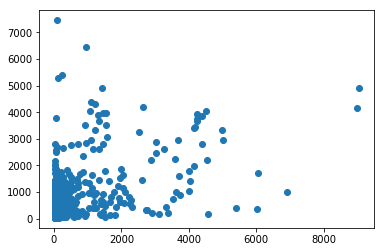

In [420]:
train_pred = grid_fit.predict(X_val)
restest = pd.DataFrame(data = {'train_value':y_val,'train_predictions':train_pred.astype(int)})
restest['train_dev'] = restest['train_value'] - restest['train_predictions']

restest.sort_index()

plt.scatter('train_value', 'train_predictions', data=restest)

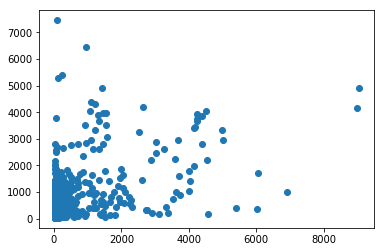

In [420]:
plt.scatter('train_value', 'train_predictions', data=restest)

### Test Prediction

Here we bring in the Tests data to submit our Predictions against the test dataset

In [387]:
test_meta = pd.read_csv('metadata/public_meta_df.csv')

display(test_meta.head(3))

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,dayofweek,hour
0,3001,False,True,1.33333,1675,2,False,False,0,10,2,2,3
1,3002,False,True,1.33333,1479,2,False,False,0,10,2,2,3
2,3003,False,True,1.33333,1505,2,False,False,0,10,2,2,3


In [388]:
#preprocess
test_meta['ad_blocked'] = test_meta['ad_blocked'].astype(int)
test_meta['embed'] = test_meta['embed'].astype(int)
test_meta['partner'] = test_meta['partner'].astype(int)
test_meta['partner_active'] = test_meta['partner_active'].astype(int)

display(test_meta.head(3))

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,dayofweek,hour
0,3001,0,1,1.33333,1675,2,0,0,0,10,2,2,3
1,3002,0,1,1.33333,1479,2,0,0,0,10,2,2,3
2,3003,0,1,1.33333,1505,2,0,0,0,10,2,2,3


In [389]:
test_meta['views'] = grid_fit.predict(test_meta.drop('comp_id', axis=1))
test_meta['views'] = test_meta.views.astype(int)

In [390]:
test_meta[['comp_id','views']]

,comp_id,views
0,3001,375
1,3002,375
2,3003,375
3,3004,925
4,3005,293
5,3006,584
6,3007,293
7,3008,382
8,3009,293
9,3010,277


In [332]:
test_pred = test_meta[['comp_id','views']]
pd.DataFrame.to_csv(test_pred,'test_predictions.csv', index=False)

## TRYING OUT OTHER METRICS

Using the MSE

In [421]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, mean_squared_error

regressor = RandomForestRegressor()

parameters = {'n_estimators':[10,50,100,200],
              'max_depth':[None,2,5,10]
             }

grid = GridSearchCV(estimator=regressor, 
                    param_grid=parameters, 
                    cv=5,
                    scoring=make_scorer(mean_squared_error),
                    verbose=1)

In [407]:
grid_fit = grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   25.6s finished


In [426]:
mean_squared_error(grid_fit.predict(X_val), y_val)
mean_squared_error(grid_fit.predict(X_val), y_val)

1026541.8842833617

In [419]:
train_pred = grid_fit.predict(X_val)
restest = pd.DataFrame(data = {'train_value':y_val,'train_predictions':train_pred.astype(int)})
restest['train_dev'] = restest['train_value'] - restest['train_predictions']

restest.sort_index()

,train_value,train_predictions,train_dev
3,63,792,-729
5,65,772,-707
7,95,92,3
9,1035,946,89
14,125,316,-191
18,390,1000,-610
24,208,296,-88
25,224,90,134
30,36,1002,-966
33,44,850,-806


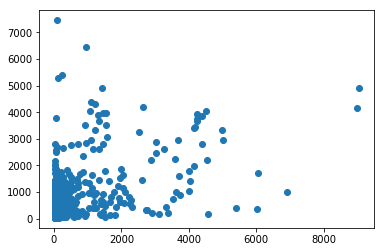

In [420]:
plt.scatter('train_value', 'train_predictions', data=restest)

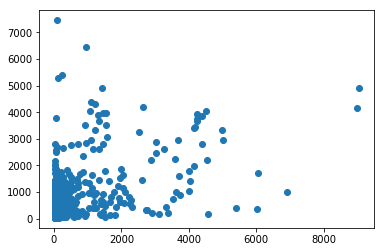

In [420]:
plt.scatter('train_value', 'train_predictions', data=restest)